In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_price_regression/focus.csv')
df

model  year  price transmission  mileage fuelType  engineSize
0      Focus  2016   8000       Manual    38852   Petrol         1.0
1      Focus  2019  13400       Manual    11952   Petrol         1.0
2      Focus  2019  14600       Manual    22142   Petrol         1.5
3      Focus  2016   9450       Manual    14549   Diesel         1.6
4      Focus  2015   9999       Manual     7010   Diesel         1.6
...      ...   ...    ...          ...      ...      ...         ...
5449   Focus  2019  18745       Manual     7855   Diesel         2.0
5450   Focus  2019  16350       Manual    13891   Petrol         1.0
5451   Focus  2019  16850       Manual    13452   Petrol         1.0
5452   Focus  2019  17310    Automatic    13376   Petrol         1.0
5453   Focus  2019  17610    Automatic     7886   Petrol         1.0

[5454 rows x 7 columns]

# Preliminary analysis

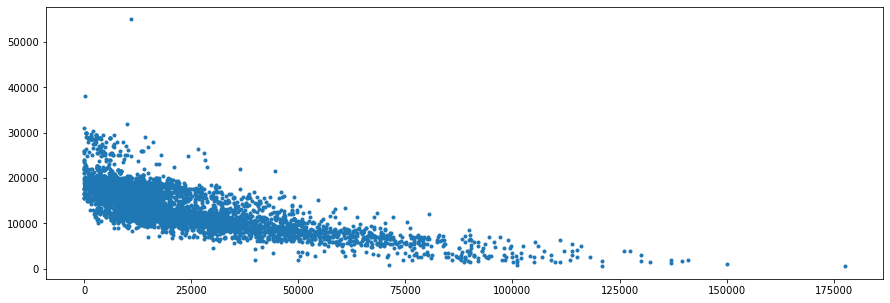

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(df.mileage,df.price, '.')

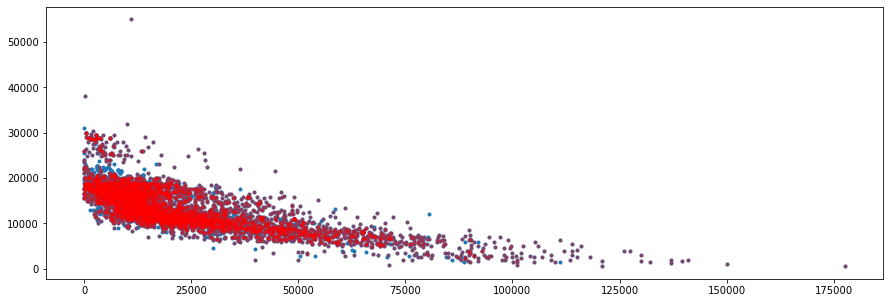

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(df.mileage,df.price, '.')
plt.plot(df.loc[df.transmission=='Manual'].mileage,df.loc[df.transmission=='Manual'].price, 'r.', alpha=.3)

### Manual cars have a depreciation cost similar as the automatic ones. That means that manual cars do not depreciate faster than automatic cars.

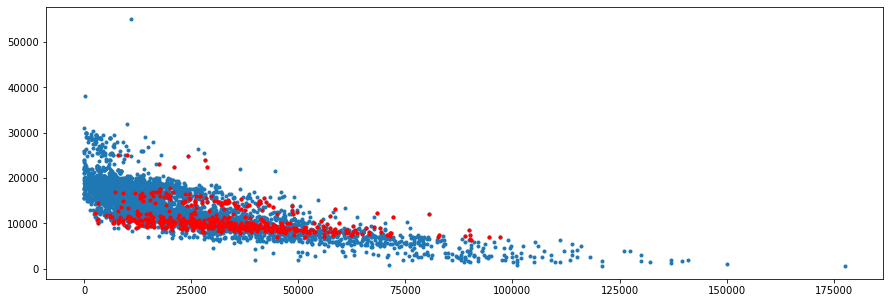

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(df.mileage,df.price, '.')
plt.plot(df.loc[df.year==2016].mileage,df.loc[df.year==2016].price, 'r.')

### All of the "older" vehicles, regardless of whether they have a high mileage or not, suffer from price depreciation.

# Objective: Understand how these variables influence the sales price

In [8]:
df.head()

model  year  price transmission  mileage fuelType  engineSize
0   Focus  2016   8000       Manual    38852   Petrol         1.0
1   Focus  2019  13400       Manual    11952   Petrol         1.0
2   Focus  2019  14600       Manual    22142   Petrol         1.5
3   Focus  2016   9450       Manual    14549   Diesel         1.6
4   Focus  2015   9999       Manual     7010   Diesel         1.6

In [9]:
df.model.value_counts(dropna=False)

 Focus    5454
Name: model, dtype: int64

In [10]:
df.shape

(5454, 7)

## Since this dataset is exclusive to the car model 'Focus', this column can be dropped.

In [12]:
df = df.drop('model', axis=1)
df

year  price transmission  mileage fuelType  engineSize
0     2016   8000       Manual    38852   Petrol         1.0
1     2019  13400       Manual    11952   Petrol         1.0
2     2019  14600       Manual    22142   Petrol         1.5
3     2016   9450       Manual    14549   Diesel         1.6
4     2015   9999       Manual     7010   Diesel         1.6
...    ...    ...          ...      ...      ...         ...
5449  2019  18745       Manual     7855   Diesel         2.0
5450  2019  16350       Manual    13891   Petrol         1.0
5451  2019  16850       Manual    13452   Petrol         1.0
5452  2019  17310    Automatic    13376   Petrol         1.0
5453  2019  17610    Automatic     7886   Petrol         1.0

[5454 rows x 6 columns]

# Dataprep

## Since we have non-ordinal categorical variables, we need to use a One Hot encoder

In [16]:
df.dtypes

year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
dtype: object

In [17]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot

year  price  mileage  engineSize  transmission_Manual  \
0     2016   8000    38852         1.0                    1   
1     2019  13400    11952         1.0                    1   
2     2019  14600    22142         1.5                    1   
3     2016   9450    14549         1.6                    1   
4     2015   9999     7010         1.6                    1   
...    ...    ...      ...         ...                  ...   
5449  2019  18745     7855         2.0                    1   
5450  2019  16350    13891         1.0                    1   
5451  2019  16850    13452         1.0                    1   
5452  2019  17310    13376         1.0                    0   
5453  2019  17610     7886         1.0                    0   

      transmission_Semi-Auto  fuelType_Petrol  
0                          0                1  
1                          0                1  
2                          0                1  
3                          0                0  
4                          0                0  
...                      ...              ...  
5449                       0                0  
5450                       0                1  
5451                       0                1  
5452                       0                1  
5453                       0                1  

[5454 rows x 7 columns]

# Data Modeling

In [18]:
X = df_onehot.drop('price', axis=1)
y = df_onehot.price
X

year  mileage  engineSize  transmission_Manual  transmission_Semi-Auto  \
0     2016    38852         1.0                    1                       0   
1     2019    11952         1.0                    1                       0   
2     2019    22142         1.5                    1                       0   
3     2016    14549         1.6                    1                       0   
4     2015     7010         1.6                    1                       0   
...    ...      ...         ...                  ...                     ...   
5449  2019     7855         2.0                    1                       0   
5450  2019    13891         1.0                    1                       0   
5451  2019    13452         1.0                    1                       0   
5452  2019    13376         1.0                    0                       0   
5453  2019     7886         1.0                    0                       0   

      fuelType_Petrol  
0                   1  
1                   1  
2                   1  
3                   0  
4                   0  
...               ...  
5449                0  
5450                1  
5451                1  
5452                1  
5453                1  

[5454 rows x 6 columns]

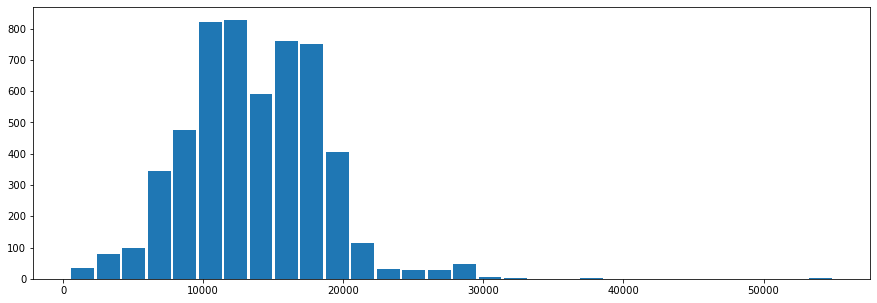

In [22]:
plt.figure(figsize=(15, 5))
plt.hist(y, bins=30, rwidth=.9);

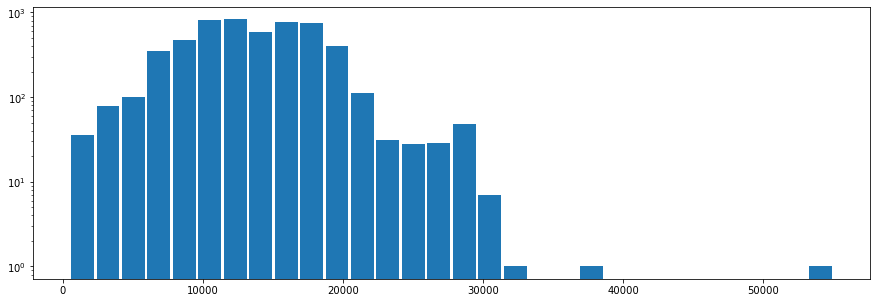

In [23]:
plt.figure(figsize=(15, 5))
plt.hist(y, bins=30, rwidth=.9, log=True);

### Apart from a couple of outliers (that bought the cars for a way higher price), most of our sales were made between the 10k and 20k price tag.

# Training the model

In [24]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=2021)

In [25]:
X_tr.shape, X_ts.shape

((3817, 6), (1637, 6))

# Data normalization

In [26]:
from sklearn.preprocessing import StandardScaler

X_tr_s = X_tr.copy()
X_ts_s = X_ts.copy()

cols_to_scale= [
    'year',
    'mileage',
    'engineSize'
]

scalers = {}
for col in cols_to_scale:
    scalers[col] = StandardScaler()
    scalers[col].fit(X_tr_s[[col]])
    X_tr_s.loc[:, col] = scalers[col].transform(X_tr_s[[col]])
    X_ts_s.loc[:, col] = scalers[col].transform(X_ts_s[[col]])

In [27]:
X_tr_s

year   mileage  engineSize  transmission_Manual  \
2285 -0.064717 -0.409304   -0.902867                    0   
4758  0.862199 -0.496792   -0.902867                    1   
3386 -0.528175 -0.362401    1.598035                    0   
2843  0.398741 -0.510644    1.598035                    1   
5307  0.862199 -0.675315   -0.902867                    1   
...        ...       ...         ...                  ...   
3934 -0.991633  0.309844    0.597674                    1   
2669  0.398741 -0.726252   -0.902867                    1   
1152 -0.991633  1.983871    0.597674                    1   
3413 -0.064717  0.044173    0.347584                    1   
1140  0.398741 -0.129587    1.598035                    1   

      transmission_Semi-Auto  fuelType_Petrol  
2285                       1                1  
4758                       0                1  
3386                       1                0  
2843                       0                1  
5307                       0                1  
...                      ...              ...  
3934                       0                0  
2669                       0                1  
1152                       0                0  
3413                       0                0  
1140                       0                1  

[3817 rows x 6 columns]

# Model fitting

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(
    fit_intercept=True,
    normalize=False,
    n_jobs=-1
)

lr.fit(X_tr_s, y_tr)

LinearRegression(n_jobs=-1)

In [30]:
y_pred = lr.predict(X_ts_s)
y_pred

array([10638.45381089, 15812.54711409, 11667.16266736, ...,
       18028.40601446, 16074.02397388, 10217.85832145])

In [32]:
X_ts.head()

year  mileage  engineSize  transmission_Manual  transmission_Semi-Auto  \
4237  2017    43839         1.0                    1                       0   
442   2019    13699         1.5                    1                       0   
4683  2016    17507         1.5                    1                       0   
4944  2019     6108         2.3                    1                       0   
3350  2015    13234         1.6                    1                       0   

      fuelType_Petrol  
4237                1  
442                 0  
4683                0  
4944                1  
3350                0

# Validating the regression

In [34]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_ts, y_pred))

1840.2644674413048

In [35]:
from sklearn.metrics import mean_absolute_error

np.sqrt(mean_absolute_error(y_ts, y_pred))

36.57480306808973

### The difference between the MSE and MAE was probably caused by the outlier values. 
- The MSE gives a bigger importance to outliers
### It's also interesting to verify if our model is biased (if the errors are randomized or if they usually tend to be higher/lower than the predicted values).

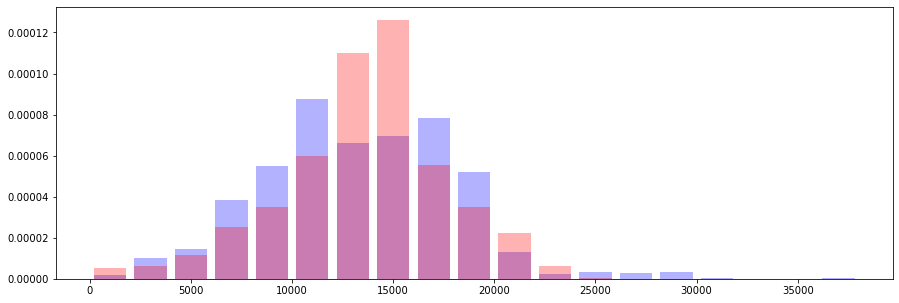

In [38]:
plt.figure(figsize=(15, 5))
M = y_ts.max()
plt.hist(y_ts, bins=np.linspace(0, M, 20), rwidth=.8, alpha=.3, color='b', density=True)
plt.hist(y_pred, bins=np.linspace(0, M, 20), rwidth=.8, alpha=.3, color='r', density=True);

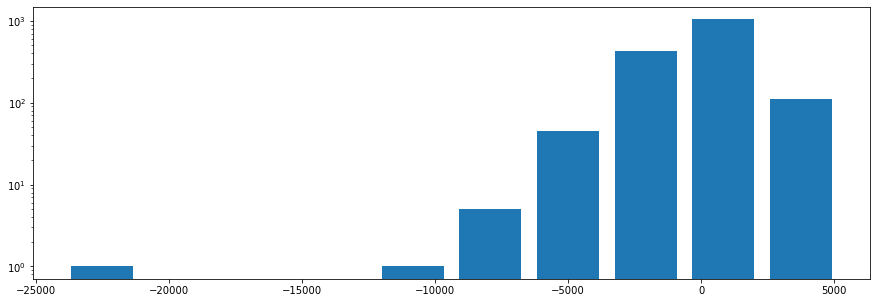

In [46]:
plt.figure(figsize=(15, 5))
plt.hist(y_pred-y_ts, bins=10, rwidth=.8, density=False, log=True);

### This model tends to predict lower values for the sales prices than the real ones. This has probably happened because of the outliers. We could also come up with hipotheses as to why this is happening:
- This could indicate that some salesmen manage to sell these cars for a higher price; 

or 
- Some clients are willing to pay more in order to "secure" the car that they want.

# Interpreting

In [47]:
lr.intercept_

12885.705771087753

In [48]:
lr.coef_

array([ 2811.89045316, -1274.03816469,  2507.541809  ,  -933.53305405,
       -2148.06938226,  2434.23015831])

In [49]:
for col, coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:40s} : {coef:7.3f}')

year                                     : 2811.890
mileage                                  : -1274.038
engineSize                               : 2507.542
transmission_Manual                      : -933.533
transmission_Semi-Auto                   : -2148.069
fuelType_Petrol                          : 2434.230


### If a variable presents a negative coef, that means that the bigger that said variable is, the lower is the price of our cars

## The intercept gives us the price of our "default" car, which means that if all our variables are nulls, the car (with these characteristics) should cost the value of the intercept

In [51]:
print( 'year', scalers['year'].mean_, scalers['year'].scale_)
print( 'mileage', scalers['mileage'].mean_, scalers['mileage'].scale_)
print( 'engineSize', scalers['engineSize'].mean_, scalers['engineSize'].scale_)

year [2017.13963846] [2.1576929]
mileage [22813.16505109] [20574.34346233]
engineSize [1.36101651] [0.39985564]


## Our "default" car characteristics are:
### - year = 2017
### - mileage = 22813 miles
### - engineSize = 1.36
### - fuelType = Diesel
### - transmission = Automatic
## This car costs 12886 dollars

In [52]:
for col, coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:40s} : {coef:7.3f}')

year                                     : 2811.890
mileage                                  : -1274.038
engineSize                               : 2507.542
transmission_Manual                      : -933.533
transmission_Semi-Auto                   : -2148.069
fuelType_Petrol                          : 2434.230


### That also means that our model predicts that:
- every 2.15 years, the car depreciates 2811 dollars in its value;
- every 20574 miles, the car depreciates 1274 dollars in its value;
- every 0.4 in engineSize, the car depreciates 2507 dollars in its value;
- Manual cars are 934 dollars cheaper than Automatic cars;
- Semi-Auto cars are 2148 dollars cheaper than Automatic cars;
- Cars that are fueled by Petrol are 2434 dollars more expensive than Diesel cars.